In [1]:
## Fed Website:
## CPIAUCSL.csv = Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
## RRVRUSQ156N.csv = Rental Vacancy Rate in the United States 
## MORTGAGE30US.csv = 30-Year Fixed Rate Mortgage Average in the United States

## From Zillow Website: 
## Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv = Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. 
##  It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.
## Metro_median_sale_price_uc_sfrcondo_sm_week.csv = Sale Price (median/mean): The price at which homes across various geographies were sold. The latest month’s number is the estimation after accounting for the latency between when sales occur and when they are reported. 
## Available only for the raw cut for all homes.

In [2]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv" ]

dfs = [pd.read_csv(f, parse_dates = True, index_col = 0) for f in fed_files]

In [3]:
dfs[0]

,MORTGAGE30US
observation_date,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2025-05-08,6.76
2025-05-15,6.81
2025-05-22,6.86


In [4]:
dfs[1]

,RRVRUSQ156N
observation_date,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2024-01-01,6.6
2024-04-01,6.6
2024-07-01,6.9


In [5]:
dfs[2]


,CPIAUCSL
observation_date,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-12-01,317.603
2025-01-01,319.086
2025-02-01,319.775


In [6]:
## combine all in one dataset 
fed_data = pd.concat(dfs, axis=1)
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2025-05-08,6.76,NaN,NaN
2025-05-15,6.81,NaN,NaN
2025-05-22,6.86,NaN,NaN


In [7]:
## 'ffill' stands for 'forward fill' and will propagate last valid observation forward.
fed_data = fed_data.ffill()
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
1947-01-01,NaN,NaN,21.480
1947-02-01,NaN,NaN,21.620
1947-03-01,NaN,NaN,22.000
1947-04-01,NaN,NaN,22.000
1947-05-01,NaN,NaN,21.950
...,...,...,...
2025-05-08,6.76,7.1,320.321
2025-05-15,6.81,7.1,320.321
2025-05-22,6.86,7.1,320.321


In [8]:
zillow_files = ["Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv", "Metro_median_sale_price_uc_sfrcondo_sm_week.csv"]
dfs = [pd.read_csv(f) for f in zillow_files]

In [9]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
0,102001,0,United States,country,NaN,103831.019582,104093.897510,104651.170068,105409.012904,106227.270380,...,369862.483324,369749.024362,368860.194744,367786.169036,366204.080970,364988.206547,363338.715660,362735.734786,363511.495783,365887.097882
1,394913,1,"New York, NY",msa,NY,183460.146453,182704.430813,182529.089750,182759.672781,183645.578181,...,692079.540789,696240.006661,698367.047069,698946.289072,698380.550171,696283.336866,694208.938000,695104.194939,697854.863019,704263.717984
2,753899,2,"Los Angeles, CA",msa,CA,185913.292200,187062.150809,187931.645556,188300.207572,188944.436098,...,979544.538611,976311.356791,973383.168666,970358.918649,968078.198528,965869.544989,961940.433570,965726.628981,970175.111658,975086.975633
3,394463,3,"Chicago, IL",msa,IL,133154.767916,132545.796260,133999.503964,135726.533004,137329.626272,...,336319.916277,336774.422505,336194.939715,335251.614495,334206.937667,333179.581125,332094.194772,332289.131773,334224.079095,337843.215779
4,394514,4,"Dallas, TX",msa,TX,111895.862762,112586.776109,113660.583793,114526.893282,115044.762772,...,389110.346498,387064.307133,385217.282621,382452.870713,379316.691483,376866.689268,375161.681691,374301.345361,374528.854567,375779.605523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,138224.896748,137621.895940,136175.330778,134499.859609,132371.648675,129892.067881,126761.963299,125550.562507,125972.583821,123588.486179
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,384929.651421,386122.259790,387299.129135,385846.239373,380887.592558,379803.831660,378786.533901,378695.733664,380900.716738,387970.927738
892,753874,937,"Craig, CO",msa,CO,69044.315861,69398.162926,70210.745101,70448.330276,71616.139897,...,293103.702165,294593.268519,296739.377074,297155.912574,295754.902719,294985.785557,291240.400645,291322.275297,292581.406204,296360.537224
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,114605.054860,112770.753451,108576.391220,106412.698342,102661.726273,101086.317042,100806.465866,97920.532095,97177.032890,97895.310246


In [10]:
## pick the data specific in Dallas, TX

dfs_dallas = [
    df.loc[df['RegionName']=='Dallas, TX'].iloc[:, 5:]
    for df in dfs
]

dfs_dallas[0]

,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,...,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30
4,111895.862762,112586.776109,113660.583793,114526.893282,115044.762772,115565.535603,116159.925637,116021.229695,115925.613568,115503.141628,...,389110.346498,387064.307133,385217.282621,382452.870713,379316.691483,376866.689268,375161.681691,374301.345361,374528.854567,375779.605523


In [11]:
dfs_dallas[1]

,2008-02-23,2008-03-01,2008-03-08,2008-03-15,2008-03-22,2008-03-29,2008-04-05,2008-04-12,2008-04-19,2008-04-26,...,2025-02-08,2025-02-15,2025-02-22,2025-03-01,2025-03-08,2025-03-15,2025-03-22,2025-03-29,2025-04-05,2025-04-12
4,135975.0,136605.0,140580.0,141580.0,142148.0,144744.0,144831.0,142811.0,145267.0,143530.0,...,371469.0,374107.0,378738.0,385000.0,391452.0,391202.0,392452.0,389952.0,390375.0,390000.0


In [12]:
## dfs_dallas[0] have data once a month, dfs_dallas[1] have data once a week
## we want to have common data we can use


for df in dfs_dallas:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

dfs_dallas[1]


,2008-02-23,2008-03-01,2008-03-08,2008-03-15,2008-03-22,2008-03-29,2008-04-05,2008-04-12,2008-04-19,2008-04-26,...,2025-02-15,2025-02-22,2025-03-01,2025-03-08,2025-03-15,2025-03-22,2025-03-29,2025-04-05,2025-04-12,month
1970-01-01 00:00:00.000000004,135975.0,136605.0,140580.0,141580.0,142148.0,144744.0,144831.0,142811.0,145267.0,143530.0,...,374107.0,378738.0,385000.0,391452.0,391202.0,392452.0,389952.0,390375.0,390000.0,1970-01


In [13]:


# ─── 1) Start from your two “wide” Dallas DataFrames ──────────────────────────────
# Each of these is 1 row × N columns, and each column name is a string like '"YYYY-MM-DD"'.
monthly_wide = dfs_dallas[0].copy()   # once‐a‐month table (columns = '"1996-02-29"', …)
weekly_wide  = dfs_dallas[1].copy()   # once‐a‐week table  (columns = '"2008-02-02"', …)

# If either of these accidentally has a column literally named "month", drop it now:
for df in (monthly_wide, weekly_wide):
    if "month" in df.columns:
        df.drop(columns=["month"], inplace=True)


# ─── 2) Turn monthly_wide.columns into a proper DatetimeIndex ────────────────────
#    a) Extract the raw column‐labels (they look like '"1996-02-29"', '"1996-03-31"', …)
monthly_dates = monthly_wide.columns.tolist()

#    b) Strip the surrounding double‐quotes so each becomes '1996-02-29', etc.
monthly_dates_clean = [col.strip('"') for col in monthly_dates]

#    c) Parse into a DatetimeIndex
monthly_idx = pd.to_datetime(monthly_dates_clean, errors="raise")

#    d) Pull out the single row of price‐values (in the same order)
monthly_values = monthly_wide.iloc[0].tolist()

#    e) Build a “long” DataFrame with index = those timestamps
monthly_long = pd.DataFrame(
    {"price": monthly_values},
    index=monthly_idx
)

#    f) Add a “month” column (Period) so we can merge later
monthly_long["month"] = monthly_long.index.to_period("M")

#    (Optional sanity check—uncomment to see)
# print(monthly_long.head())
# print("monthly_long.shape:", monthly_long.shape)


# ─── 3) Do the same for the weekly table ───────────────────────────────────────────
weekly_dates = weekly_wide.columns.tolist()             # e.g. ['"2008-02-02"', …]
weekly_dates_clean = [col.strip('"') for col in weekly_dates]
weekly_idx = pd.to_datetime(weekly_dates_clean, errors="raise")
weekly_values = weekly_wide.iloc[0].tolist()

weekly_long = pd.DataFrame(
    {"value": weekly_values},
    index=weekly_idx
)
weekly_long["month"] = weekly_long.index.to_period("M")

#    (Optional sanity check—uncomment to see)
# print(weekly_long.head())
# print("weekly_long.shape:", weekly_long.shape)


# ─── 4) Merge the two “long” DataFrames so that each weekly row gets its month’s price ───
#    a) Reset index so “date” is a column, keep “month” as well:
monthly_reset = monthly_long.reset_index().rename(columns={"index": "date"})
weekly_reset  = weekly_long.reset_index().rename(columns={"index": "date"})

#    b) Merge on “month”, keeping all weekly rows (how="left"):
price_data = weekly_reset.merge(
    monthly_reset,
    on="month",
    how="left",
    suffixes=("_value", "_price")
)

# ─── 5) Clean up columns and set the final index ──────────────────────────────────────
# We only want one “date” (the weekly date), plus the two price columns:
price_data["date"] = price_data["date_value"]

# Keep “date”, “price” (monthly), and “value” (weekly); drop everything else
price_data = price_data.loc[:, ["date", "price", "value"]]

# Set “date” back as the index, and rename columns exactly as in the tutorial:
price_data = price_data.set_index("date")
price_data.columns = ["price", "value"]

# ─── 6) Print out the final 754 × 2 table ───────────────────────────────────────────
print(f"\nFinal DataFrame shape: {price_data.shape}\n")
print(price_data.head(8))    # first few rows
print("   …")
print(price_data.tail(10))    # last few rows



Final DataFrame shape: (895, 2)

                    price     value
date                               
2008-02-23  155992.445745  135975.0
2008-03-01  155951.121044  136605.0
2008-03-08  155951.121044  140580.0
2008-03-15  155951.121044  141580.0
2008-03-22  155951.121044  142148.0
2008-03-29  155951.121044  144744.0
2008-04-05  156490.911643  144831.0
2008-04-12  156490.911643  142811.0
   …
                    price     value
date                               
2025-02-08  374301.345361  371469.0
2025-02-15  374301.345361  374107.0
2025-02-22  374301.345361  378738.0
2025-03-01  374528.854567  385000.0
2025-03-08  374528.854567  391452.0
2025-03-15  374528.854567  391202.0
2025-03-22  374528.854567  392452.0
2025-03-29  374528.854567  389952.0
2025-04-05  375779.605523  390375.0
2025-04-12  375779.605523  390000.0


In [14]:
fed_data = fed_data.dropna()
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
2025-02-06,6.89,7.1,319.775
2025-02-13,6.87,7.1,319.775
2025-02-20,6.85,7.1,319.775
2025-02-27,6.76,7.1,319.775
2025-03-01,6.76,7.1,319.615
2025-03-06,6.63,7.1,319.615
2025-03-13,6.65,7.1,319.615
2025-03-20,6.67,7.1,319.615
2025-03-27,6.65,7.1,319.615


In [15]:
## Align Zillow data date with Fed data date
from datetime import timedelta
fed_data.index = fed_data.index + timedelta(days=2)
fed_data.tail()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
2025-05-10,6.76,7.1,320.321
2025-05-17,6.81,7.1,320.321
2025-05-24,6.86,7.1,320.321
2025-05-31,6.89,7.1,320.321
2025-06-07,6.85,7.1,320.321


In [16]:
## Merge two Zillow data and Fed data

price_data = fed_data.merge(price_data, left_index = True, right_index = True)
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0
...,...,...,...,...,...
2025-03-15,6.65,7.1,319.615,374528.854567,391202.0
2025-03-22,6.67,7.1,319.615,374528.854567,392452.0
2025-03-29,6.65,7.1,319.615,374528.854567,389952.0
2025-04-05,6.64,7.1,320.321,375779.605523,390375.0


In [17]:
## Rename Column

price_data.columns = ["Interest","Vacancy","CPI","Price","Value"]
price_data

,Interest,Vacancy,CPI,Price,Value
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0
...,...,...,...,...,...
2025-03-15,6.65,7.1,319.615,374528.854567,391202.0
2025-03-22,6.67,7.1,319.615,374528.854567,392452.0
2025-03-29,6.65,7.1,319.615,374528.854567,389952.0
2025-04-05,6.64,7.1,320.321,375779.605523,390375.0


<Axes: >

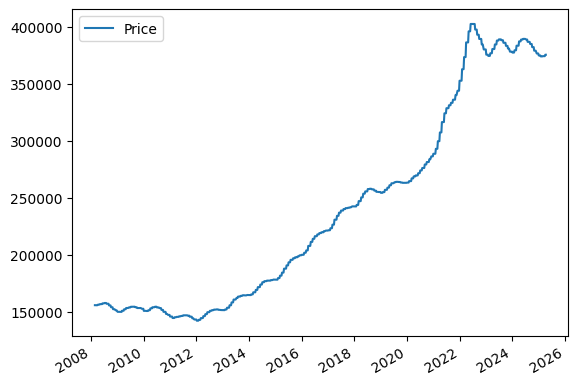

In [18]:
price_data.plot.line(y="Price", use_index=True)

<Axes: >

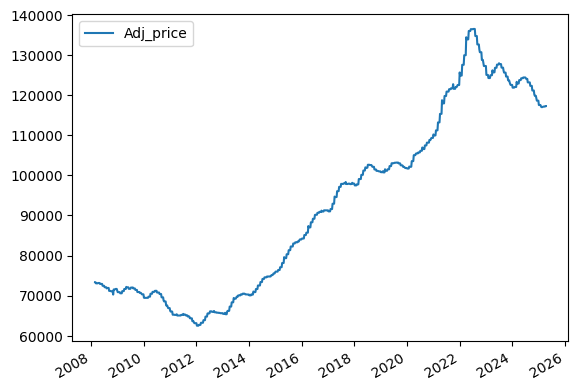

In [19]:
# don't want to let inflation to affect the price prediction 
price_data["Adj_price"] = price_data["Price"] / price_data["CPI"] *100
price_data.plot.line(y="Adj_price", use_index=True)

<Axes: >

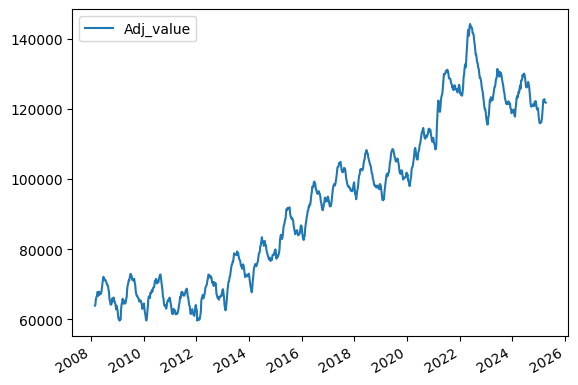

In [20]:
# don't want to let inflation to affect the house value prediction 
price_data["Adj_value"] = price_data["Value"] / price_data["CPI"] *100
price_data.plot.line(y="Adj_value", use_index=True)

In [21]:
# set up the target for machine learnining by using shift method 

price_data["next_quarter"] = price_data["Adj_price"].shift(-13)

price_data

,Interest,Vacancy,CPI,Price,Value,Adj_price,Adj_value,next_quarter
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0,73343.667335,63931.975156,72919.973643
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0,73324.237515,64228.185079,72919.973643
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0,73062.816725,65861.474457,72456.715200
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0,73062.816725,66329.972640,72456.715200
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0,73062.816725,66596.079607,72456.715200
...,...,...,...,...,...,...,...,...
2025-03-15,6.65,7.1,319.615,374528.854567,391202.0,117181.250744,122397.884955,NaN
2025-03-22,6.67,7.1,319.615,374528.854567,392452.0,117181.250744,122788.980492,NaN
2025-03-29,6.65,7.1,319.615,374528.854567,389952.0,117181.250744,122006.789419,NaN
2025-04-05,6.64,7.1,320.321,375779.605523,390375.0,117313.446675,121869.936720,NaN


In [22]:
print(type(price_data))

<class 'pandas.core.frame.DataFrame'>


In [23]:
price_data = price_data.dropna()
price_data

,Interest,Vacancy,CPI,Price,Value,Adj_price,Adj_value,next_quarter
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0,73343.667335,63931.975156,72919.973643
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0,73324.237515,64228.185079,72919.973643
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0,73062.816725,65861.474457,72456.715200
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0,73062.816725,66329.972640,72456.715200
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0,73062.816725,66596.079607,72456.715200
...,...,...,...,...,...,...,...,...
2024-12-14,6.60,6.9,317.603,376866.689268,380375.0,118659.675528,119764.296937,117181.250744
2024-12-21,6.72,6.9,317.603,376866.689268,381875.0,118659.675528,120236.584667,117181.250744
2024-12-28,6.85,6.9,317.603,376866.689268,379120.0,118659.675528,119369.149536,117181.250744
2025-01-04,6.91,7.1,319.086,375161.681691,375495.0,117573.845826,117678.306162,117313.446675


In [24]:
price_data["change"] = (price_data["next_quarter"] > price_data["Adj_price"]).astype(int)
price_data

/var/folders/mn/jmrdlt0s69g06fc9ft1b9g6h0000gn/T/ipykernel_70918/2656597242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data["change"] = (price_data["next_quarter"] > price_data["Adj_price"]).astype(int)


,Interest,Vacancy,CPI,Price,Value,Adj_price,Adj_value,next_quarter,change
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0,73343.667335,63931.975156,72919.973643,0
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0,73324.237515,64228.185079,72919.973643,0
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0,73062.816725,65861.474457,72456.715200,0
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0,73062.816725,66329.972640,72456.715200,0
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0,73062.816725,66596.079607,72456.715200,0
...,...,...,...,...,...,...,...,...,...
2024-12-14,6.60,6.9,317.603,376866.689268,380375.0,118659.675528,119764.296937,117181.250744,0
2024-12-21,6.72,6.9,317.603,376866.689268,381875.0,118659.675528,120236.584667,117181.250744,0
2024-12-28,6.85,6.9,317.603,376866.689268,379120.0,118659.675528,119369.149536,117181.250744,0
2025-01-04,6.91,7.1,319.086,375161.681691,375495.0,117573.845826,117678.306162,117313.446675,0


In [25]:
## To know how many weeks go up and how many weeks go down
price_data["change"].value_counts()

change
1    535
0    324
Name: count, dtype: int64

In [26]:
predictors = ["Interest","Vacancy","Adj_value"]
target = "change"

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [28]:
START = 400
STEP = 52

def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))

    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target],preds)

In [29]:
preds, accuracy = backtest(price_data, predictors, target)

In [30]:
accuracy

0.5925925925925926

In [31]:
## Try to improve accuracy
yearly = price_data.rolling(52, min_periods = 1).mean()
yearly

,Interest,Vacancy,CPI,Price,Value,Adj_price,Adj_value,next_quarter,change
2008-02-23,6.040000,10.100000,212.687000,155992.445745,135975.000000,73343.667335,63931.975156,72919.973643,0.000000
2008-03-01,6.140000,10.100000,212.687000,155971.783394,136290.000000,73333.952425,64080.080118,72919.973643,0.000000
2008-03-08,6.103333,10.100000,212.940667,155964.895944,137720.000000,73243.573858,64673.878231,72765.554162,0.000000
2008-03-15,6.110000,10.100000,213.067500,155961.452219,138685.000000,73198.384575,65087.901833,72688.344422,0.000000
2008-03-22,6.062000,10.100000,213.143600,155959.385984,139377.600000,73171.271005,65389.537388,72642.018577,0.000000
...,...,...,...,...,...,...,...,...,...
2024-12-14,6.719808,6.726923,313.097538,383856.182360,386732.480769,122603.735602,123512.745194,121410.387316,0.384615
2024-12-21,6.713846,6.732692,313.268077,383825.388818,386946.423077,122528.216491,123515.625556,121299.765313,0.365385
2024-12-28,6.711923,6.738462,313.438615,383794.595276,387114.596154,122452.697380,123504.160308,121189.143310,0.346154
2025-01-04,6.716538,6.748077,313.637673,383731.013127,387285.173077,122356.296929,123483.537185,121081.063536,0.326923


In [32]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
price_data

/var/folders/mn/jmrdlt0s69g06fc9ft1b9g6h0000gn/T/ipykernel_70918/2303999423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
/var/folders/mn/jmrdlt0s69g06fc9ft1b9g6h0000gn/T/ipykernel_70918/2303999423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
/var/folders/mn/jmrdlt0s69g06fc9ft1b9g6h0000gn/T/ipykernel_70918/2303999423.py:2: SettingWithCopyWarning: 
A val

,Interest,Vacancy,CPI,Price,Value,Adj_price,Adj_value,next_quarter,change,Interest_year,Vacancy_year,Adj_value_year
2008-02-23,6.04,10.1,212.687,155992.445745,135975.0,73343.667335,63931.975156,72919.973643,0,1.000000,1.000000,1.000000
2008-03-01,6.24,10.1,212.687,155951.121044,136605.0,73324.237515,64228.185079,72919.973643,0,1.016287,1.000000,1.002311
2008-03-08,6.03,10.1,213.448,155951.121044,140580.0,73062.816725,65861.474457,72456.715200,0,0.987985,1.000000,1.018363
2008-03-15,6.13,10.1,213.448,155951.121044,141580.0,73062.816725,66329.972640,72456.715200,0,1.003273,1.000000,1.019083
2008-03-22,5.87,10.1,213.448,155951.121044,142148.0,73062.816725,66596.079607,72456.715200,0,0.968327,1.000000,1.018452
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-14,6.60,6.9,317.603,376866.689268,380375.0,118659.675528,119764.296937,117181.250744,0,0.982171,1.025729,0.969651
2024-12-21,6.72,6.9,317.603,376866.689268,381875.0,118659.675528,120236.584667,117181.250744,0,1.000917,1.024850,0.973452
2024-12-28,6.85,6.9,317.603,376866.689268,379120.0,118659.675528,119369.149536,117181.250744,0,1.020572,1.023973,0.966519
2025-01-04,6.91,7.1,319.086,375161.681691,375495.0,117573.845826,117678.306162,117313.446675,0,1.028804,1.052152,0.952988


In [33]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)
accuracy

0.6470588235294118

In [72]:
pred_match = (preds == price_data[target].iloc[START:])

In [74]:
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

/var/folders/mn/jmrdlt0s69g06fc9ft1b9g6h0000gn/T/ipykernel_70918/1532675083.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'green' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  pred_match[pred_match == True] = "green"


<Axes: xlabel='index', ylabel='Adj_price'>

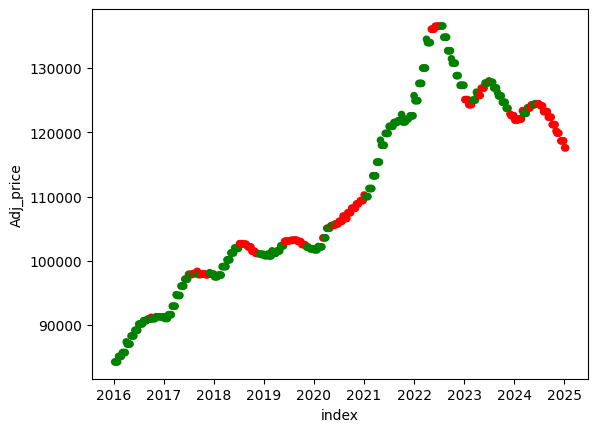

In [76]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="Adj_price", color=pred_match)